In [335]:
import pandas as pd
import re
import numpy as np

# Data Exploration

##### Create tables

In [336]:
merged_df = pd.read_pickle('data/merged_mean_data.pkl').fillna(0)
merged_df['gender.label'] = merged_df['gender.label'].apply(lambda label: 1 if label == 'male' else 0).apply(pd.to_numeric)

merged_df.head(5)


,"psychopath,empath","punchable,loveable","arrogant,humble","selfish,altruistic","cruel,kind","vengeful,forgiving","quarrelsome,warm","impatient,patient","juvenile,mature","entitled,grateful",...,"outsider,insider","industrial,domestic","complicated,simple","literary,mathematical","slow,fast","careful,brave",race.label,race.confidence,gender.label,gender.confidence
A1,55.5,31.0,51.7,59.7,63.1,60.1,45.0,48.6,73.3,34.7,...,60.5,29.6,52.7,65.8,53.0,57.8,asian,1.0,1,1.00
A4,16.9,18.9,20.9,29.4,26.2,27.5,25.1,61.8,74.4,7.7,...,41.7,15.4,30.3,87.7,63.3,26.2,white,1.0,1,0.94
AD1,75.3,51.9,45.9,61.5,68.2,64.9,40.4,55.0,72.8,38.0,...,44.1,61.8,44.0,76.0,65.2,23.8,white,1.0,1,0.89
AD7,44.8,38.1,29.0,40.8,77.5,73.0,64.4,46.0,14.8,32.0,...,12.1,82.1,44.1,24.8,18.9,37.1,white,1.0,1,1.00
AHX1,48.6,57.0,33.9,25.0,48.1,60.2,19.7,28.7,22.5,31.5,...,21.8,47.2,22.2,25.0,66.5,60.8,white,1.0,1,0.92


In [337]:
merged_df.shape

(858, 364)

##### Standardize index names

In [338]:
traits_columns = list(filter(lambda col: ',' in col, merged_df.columns.values))

print('Total Dual Traits:', len(traits_columns))

Total Dual Traits: 360


# Predict the Gender

In [350]:
from sklearn.linear_model import LassoCV, Ridge, RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# For gender prediction, we remove the 'masculine' label
gender_columns = list(filter(lambda trait: 'masculine' not in trait, traits_columns))
X = merged_df[gender_columns].values
y = merged_df['gender.label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifier = LogisticRegression(penalty='l2', max_iter=5000) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
gender_accuracy = accuracy_score(y_test, y_pred, normalize=True)

print('Gender Accuracy:', gender_accuracy)



Gender Accuracy: 0.9651162790697675


In [316]:
merged_df['gender.label'].value_counts()

1    577
0    281
Name: gender.label, dtype: int64

# Predict the Race

In [359]:
from sklearn.linear_model import LassoCV, Ridge, RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

# For gender prediction, we remove the 'masculine' label
race_columns = list(traits_columns)
race_columns.append('gender.label')

y_encoder = LabelEncoder()

X = merged_df[race_columns].values
y = y_encoder.fit_transform(merged_df['race.label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifier = RandomForestClassifier(n_estimators=2**8, criterion='gini')  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=True)

print('Race Accuracy:', accuracy)


Race Accuracy: 0.8546511627906976


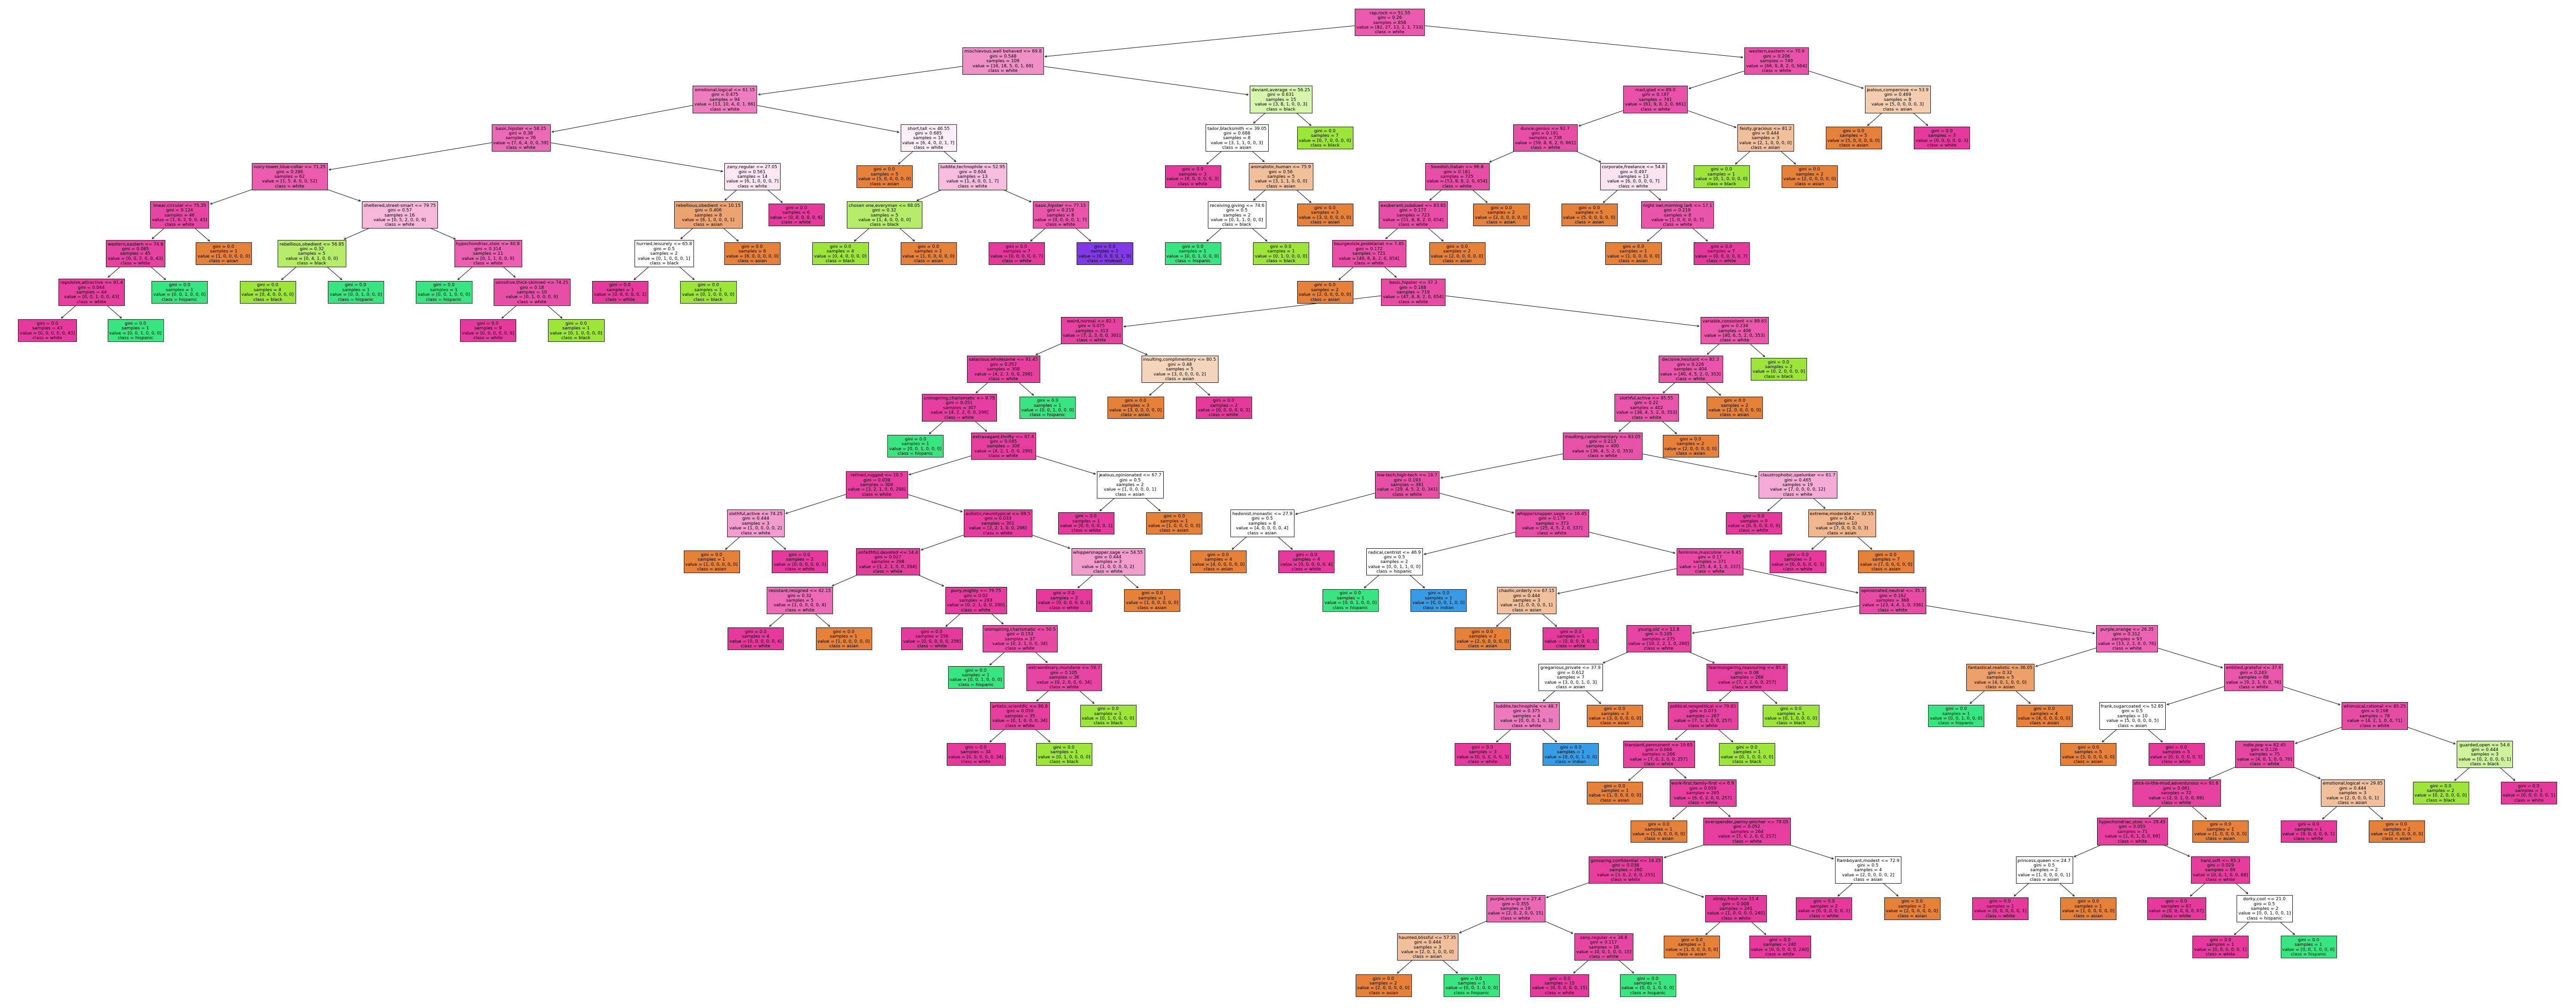

In [332]:
from sklearn import tree
from matplotlib import pyplot as plt

decision_tree_classifier = DecisionTreeClassifier(criterion='gini')  
decision_tree_classifier.fit(X, y)



fig = plt.figure(figsize=(100,40))
_ = tree.plot_tree(decision_tree_classifier, 
                   feature_names=race_columns,  
                   class_names=y_encoder.classes_,
                   filled=True,
                   label='all')

In [ ]:
merged_df['race.label'].value_counts()['white'] / len(merged_df['race.label'])

In [286]:
merged_df['race.label'].value_counts()

white       733
asian        82
black        27
hispanic     13
indian        2
mideast       1
Name: race.label, dtype: int64

In [287]:
len(merged_df['race.label'])

858